In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statistics import mean, stdev

In [2]:
sns.set_style('darkgrid')
cmap=sns.light_palette("seagreen",as_cmap=True)

In [3]:
unfair = pd.read_csv('adult-result/unfair_lr-100.csv', index_col=0)
zhang = pd.read_csv('adult-result/zhang-100.csv', index_col=0)
laftr = pd.read_csv('adult-result/laftr-100.csv', index_col=0)

In [4]:
unfair

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,UnfairLR-decay,13,0.837233,0.806283,0.856564,0.799981,0.821467,0.846788,0.818183,3807.0,62.0,314.0,197.0,5642.0,647.0,1175.0,1660.0
1,UnfairLR-decay,29,0.836567,0.798439,0.846336,0.782983,0.817058,0.841423,0.808888,3802.0,76.0,311.0,195.0,5588.0,690.0,1130.0,1712.0
2,UnfairLR-decay,42,0.835530,0.811083,0.865257,0.811986,0.823125,0.850134,0.823590,3856.0,69.0,308.0,191.0,5603.0,616.0,1228.0,1633.0
3,UnfairLR-decay,55,0.834345,0.810234,0.861803,0.804664,0.822113,0.847852,0.819236,3778.0,71.0,310.0,189.0,5638.0,623.0,1233.0,1662.0
4,UnfairLR-decay,73,0.833605,0.804183,0.868893,0.824305,0.818630,0.850883,0.828929,3799.0,70.0,286.0,192.0,5572.0,651.0,1240.0,1694.0
5,UnfairLR,13,0.849156,0.814985,0.902947,0.885014,0.831719,0.875226,0.866714,3782.0,87.0,250.0,261.0,5650.0,639.0,1061.0,1774.0
6,UnfairLR,29,0.849230,0.803651,0.889696,0.865887,0.825812,0.868992,0.857477,3794.0,84.0,250.0,256.0,5599.0,679.0,1023.0,1819.0
7,UnfairLR,42,0.854414,0.812003,0.913281,0.902751,0.832668,0.882867,0.877917,3834.0,91.0,228.0,271.0,5601.0,618.0,1029.0,1832.0
8,UnfairLR,55,0.850489,0.815062,0.903148,0.878344,0.832399,0.876028,0.864192,3755.0,94.0,246.0,253.0,5657.0,604.0,1075.0,1820.0
9,UnfairLR,73,0.847823,0.803366,0.897272,0.874468,0.824996,0.871847,0.860940,3771.0,98.0,234.0,244.0,5568.0,655.0,1068.0,1866.0


In [5]:
zhang

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,Zhang4DP,13,0.849378,0.811971,0.898506,0.878278,0.830253,0.873251,0.863586,3786.0,83.0,252.0,259.0,5643.0,646.0,1053.0,1782.0
1,Zhang4DP,29,0.850267,0.804985,0.894028,0.873792,0.827006,0.871598,0.861869,3796.0,82.0,246.0,260.0,5607.0,671.0,1023.0,1819.0
2,Zhang4DP,42,0.855450,0.810959,0.911109,0.898743,0.832611,0.882403,0.876562,3841.0,84.0,230.0,269.0,5610.0,609.0,1029.0,1832.0
3,Zhang4DP,55,0.850637,0.813102,0.899535,0.872677,0.831446,0.874403,0.861516,3761.0,88.0,249.0,250.0,5657.0,604.0,1076.0,1819.0
4,Zhang4DP,73,0.847675,0.799658,0.893716,0.871354,0.822967,0.870087,0.859351,3779.0,90.0,235.0,243.0,5556.0,667.0,1065.0,1869.0
5,Zhang4EqOdds,13,0.849970,0.811158,0.897152,0.875968,0.830111,0.872924,0.862774,3790.0,79.0,253.0,258.0,5647.0,642.0,1052.0,1783.0
6,Zhang4EqOdds,29,0.849896,0.803761,0.892257,0.871464,0.826185,0.870562,0.860545,3797.0,81.0,247.0,259.0,5601.0,677.0,1022.0,1820.0
7,Zhang4EqOdds,42,0.855302,0.810078,0.911152,0.900048,0.832076,0.882344,0.877105,3842.0,83.0,229.0,270.0,5604.0,615.0,1027.0,1834.0
8,Zhang4EqOdds,55,0.850785,0.813079,0.897851,0.868669,0.831505,0.873684,0.859634,3761.0,88.0,251.0,248.0,5661.0,600.0,1076.0,1819.0
9,Zhang4EqOdds,73,0.847379,0.799198,0.891714,0.867511,0.822583,0.868981,0.857326,3779.0,90.0,237.0,241.0,5555.0,668.0,1066.0,1868.0


In [6]:
laftr

,model_name,cv_seed,fair_coeff,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,LAFTR4DP,13,0.2,0.848786,0.823688,0.922764,0.919181,0.836048,0.884230,0.882582,3759.0,110.0,232.0,279.0,5647.0,642.0,1058.0,1777.0
1,LAFTR4DP,13,0.5,0.849082,0.844694,0.958788,0.976855,0.846882,0.900606,0.908498,3736.0,133.0,211.0,300.0,5700.0,589.0,1105.0,1730.0
2,LAFTR4DP,13,0.7,0.849378,0.859279,0.967224,0.983948,0.854300,0.904479,0.911724,3724.0,145.0,198.0,313.0,5742.0,547.0,1144.0,1691.0
3,LAFTR4DP,13,1.0,0.848415,0.869088,0.960648,0.964514,0.858627,0.901050,0.902747,3720.0,149.0,196.0,315.0,5775.0,514.0,1188.0,1647.0
4,LAFTR4DP,29,0.2,0.848786,0.819025,0.911814,0.899777,0.833639,0.879172,0.873538,3786.0,92.0,243.0,263.0,5651.0,627.0,1080.0,1762.0
5,LAFTR4DP,29,0.5,0.849230,0.831824,0.937349,0.942739,0.840437,0.891116,0.893545,3770.0,108.0,225.0,281.0,5676.0,602.0,1101.0,1741.0
6,LAFTR4DP,29,0.7,0.850341,0.852540,0.967794,0.988270,0.851439,0.905274,0.914132,3758.0,120.0,213.0,293.0,5753.0,525.0,1163.0,1679.0
7,LAFTR4DP,29,1.0,0.847971,0.869826,0.965895,0.972966,0.858759,0.903100,0.906179,3735.0,143.0,203.0,303.0,5788.0,490.0,1217.0,1625.0
8,LAFTR4DP,42,0.2,0.852488,0.792282,0.908622,0.912026,0.821283,0.879660,0.881253,3806.0,119.0,200.0,299.0,5441.0,778.0,895.0,1966.0
9,LAFTR4DP,42,0.5,0.850563,0.813449,0.946545,0.974103,0.831592,0.895991,0.908151,3769.0,156.0,176.0,323.0,5468.0,751.0,935.0,1926.0


## Acc mean and std

In [7]:
unfair_acc = unfair.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
zhang_acc = zhang.groupby(['model_name'])['clas_acc'].agg([mean, stdev])
laftr_acc = laftr.groupby(['model_name', 'fair_coeff'])['clas_acc'].agg([mean, stdev])

In [8]:
acc = pd.concat([unfair_acc, zhang_acc, laftr_acc])
acc = acc.reset_index()
acc = acc.rename(columns={'index': 'model_name'})
acc

,model_name,mean,stdev
0,UnfairLR,0.850222,0.002526
1,UnfairLR-decay,0.835456,0.001505
2,Zhang4DP,0.850681,0.002901
3,Zhang4EqOdds,0.850666,0.002889
4,Zhang4EqOpp,0.850030,0.002160
5,"(LAFTR4DP, 0.2)",0.849763,0.001933
6,"(LAFTR4DP, 0.5)",0.849230,0.001620
7,"(LAFTR4DP, 0.7)",0.848519,0.001931
8,"(LAFTR4DP, 1.0)",0.847867,0.002575
9,"(LAFTR4EqOdds, 0.2)",0.849230,0.002122


In [9]:
names = acc['model_name'].to_list()
for i in range(len(names)):
    if isinstance(names[i], tuple):
        names[i] = '-'.join([str(value) for value in names[i]])

names

['UnfairLR',
 'UnfairLR-decay',
 'Zhang4DP',
 'Zhang4EqOdds',
 'Zhang4EqOpp',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0']

In [10]:
acc['model_name'] = names
acc

,model_name,mean,stdev
0,UnfairLR,0.850222,0.002526
1,UnfairLR-decay,0.835456,0.001505
2,Zhang4DP,0.850681,0.002901
3,Zhang4EqOdds,0.850666,0.002889
4,Zhang4EqOpp,0.850030,0.002160
5,LAFTR4DP-0.2,0.849763,0.001933
6,LAFTR4DP-0.5,0.849230,0.001620
7,LAFTR4DP-0.7,0.848519,0.001931
8,LAFTR4DP-1.0,0.847867,0.002575
9,LAFTR4EqOdds-0.2,0.849230,0.002122


## Fairness mean and std

In [11]:
unfair_dp = unfair.groupby(['model_name'])['dp'].agg([mean, stdev])
zhang_dp = zhang.groupby(['model_name'])['dp'].agg([mean, stdev])
laftr_dp = laftr.groupby(['model_name', 'fair_coeff'])['dp'].agg([mean, stdev])

In [12]:
dp = pd.concat([unfair_dp, zhang_dp, laftr_dp])
dp = dp.reset_index()
dp = dp.rename(columns={'index': 'model_name'})
dp['model_name'] = names
dp

,model_name,mean,stdev
0,UnfairLR,0.809813,0.005887
1,UnfairLR-decay,0.806044,0.005107
2,Zhang4DP,0.808135,0.005682
3,Zhang4EqOdds,0.807455,0.005789
4,Zhang4EqOpp,0.808692,0.005510
5,LAFTR4DP-0.2,0.813928,0.014624
6,LAFTR4DP-0.5,0.833471,0.012559
7,LAFTR4DP-0.7,0.855400,0.013612
8,LAFTR4DP-1.0,0.870953,0.016164
9,LAFTR4EqOdds-0.2,0.848506,0.014706


In [13]:
unfair_deqodds = unfair.groupby(['model_name'])['deqodds'].agg([mean, stdev])
zhang_deqodds = zhang.groupby(['model_name'])['deqodds'].agg([mean, stdev])
laftr_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['deqodds'].agg([mean, stdev])

In [14]:
deqodds = pd.concat([unfair_deqodds, zhang_deqodds, laftr_deqodds])
deqodds = deqodds.reset_index()
deqodds = deqodds.rename(columns={'index': 'model_name'})
deqodds['model_name'] = names
deqodds

,model_name,mean,stdev
0,UnfairLR,0.901269,0.008668
1,UnfairLR-decay,0.859771,0.008778
2,Zhang4DP,0.899379,0.007055
3,Zhang4EqOdds,0.898025,0.007845
4,Zhang4EqOpp,0.900078,0.008006
5,LAFTR4DP-0.2,0.918923,0.008714
6,LAFTR4DP-0.5,0.951962,0.010736
7,LAFTR4DP-0.7,0.964832,0.005167
8,LAFTR4DP-1.0,0.956709,0.008025
9,LAFTR4EqOdds-0.2,0.967132,0.005112


In [15]:
unfair_deqopp = unfair.groupby(['model_name'])['deqopp'].agg([mean, stdev])
zhang_deqopp = zhang.groupby(['model_name'])['deqopp'].agg([mean, stdev])
laftr_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['deqopp'].agg([mean, stdev])

In [16]:
deqopp = pd.concat([unfair_deqopp, zhang_deqopp, laftr_deqopp])
deqopp = deqopp.reset_index()
deqopp = deqopp.rename(columns={'index': 'model_name'})
deqopp['model_name'] = names
deqopp

,model_name,mean,stdev
0,UnfairLR,0.881293,0.013846
1,UnfairLR-decay,0.804784,0.015259
2,Zhang4DP,0.878969,0.011356
3,Zhang4EqOdds,0.876732,0.013435
4,Zhang4EqOpp,0.880146,0.014112
5,LAFTR4DP-0.2,0.915769,0.010220
6,LAFTR4DP-0.5,0.968471,0.018413
7,LAFTR4DP-0.7,0.979062,0.009655
8,LAFTR4DP-1.0,0.952856,0.023384
9,LAFTR4EqOdds-0.2,0.988875,0.008204


## Trade-offs mean and std

In [17]:
unfair_trade_dp = unfair.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
zhang_trade_dp = zhang.groupby(['model_name'])['trade_dp'].agg([mean, stdev])
laftr_trade_dp = laftr.groupby(['model_name', 'fair_coeff'])['trade_dp'].agg([mean, stdev])

In [18]:
trade_dp = pd.concat([unfair_trade_dp, zhang_trade_dp, laftr_trade_dp])
trade_dp = trade_dp.reset_index()
trade_dp = trade_dp.rename(columns={'index': 'model_name'})
trade_dp['model_name'] = names
trade_dp

,model_name,mean,stdev
0,UnfairLR,0.829519,0.003783
1,UnfairLR-decay,0.820479,0.002538
2,Zhang4DP,0.828857,0.003901
3,Zhang4EqOdds,0.828492,0.004024
4,Zhang4EqOpp,0.828839,0.003451
5,LAFTR4DP-0.2,0.831400,0.007396
6,LAFTR4DP-0.5,0.841236,0.006337
7,LAFTR4DP-0.7,0.851895,0.006295
8,LAFTR4DP-1.0,0.859184,0.007140
9,LAFTR4EqOdds-0.2,0.848808,0.006837


In [19]:
unfair_trade_deqodds = unfair.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
zhang_trade_deqodds = zhang.groupby(['model_name'])['trade_deqodds'].agg([mean, stdev])
laftr_trade_deqodds = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqodds'].agg([mean, stdev])

In [20]:
trade_deqodds = pd.concat([unfair_trade_deqodds, zhang_trade_deqodds, laftr_trade_deqodds])
trade_deqodds = trade_deqodds.reset_index()
trade_deqodds = trade_deqodds.rename(columns={'index': 'model_name'})
trade_deqodds['model_name'] = names
trade_deqodds

,model_name,mean,stdev
0,UnfairLR,0.874992,0.005221
1,UnfairLR-decay,0.847416,0.003738
2,Zhang4DP,0.874348,0.004791
3,Zhang4EqOdds,0.873699,0.005183
4,Zhang4EqOpp,0.874329,0.004721
5,LAFTR4DP-0.2,0.882972,0.003919
6,LAFTR4DP-0.5,0.897638,0.004291
7,LAFTR4DP-0.7,0.902938,0.002155
8,LAFTR4DP-1.0,0.898991,0.003707
9,LAFTR4EqOdds-0.2,0.904346,0.002044


In [21]:
unfair_trade_deqopp = unfair.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
zhang_trade_deqopp = zhang.groupby(['model_name'])['trade_deqopp'].agg([mean, stdev])
laftr_trade_deqopp = laftr.groupby(['model_name', 'fair_coeff'])['trade_deqopp'].agg([mean, stdev])

In [22]:
trade_deqopp = pd.concat([unfair_trade_deqopp, zhang_trade_deqopp, laftr_trade_deqopp])
trade_deqopp = trade_deqopp.reset_index()
trade_deqopp = trade_deqopp.rename(columns={'index': 'model_name'})
trade_deqopp['model_name'] = names
trade_deqopp

,model_name,mean,stdev
0,UnfairLR,0.865448,0.007787
1,UnfairLR-decay,0.819765,0.007411
2,Zhang4DP,0.864577,0.006867
3,Zhang4EqOdds,0.863477,0.007864
4,Zhang4EqOpp,0.864792,0.007712
5,LAFTR4DP-0.2,0.881509,0.004864
6,LAFTR4DP-0.5,0.904866,0.007596
7,LAFTR4DP-0.7,0.909112,0.004685
8,LAFTR4DP-1.0,0.897196,0.010904
9,LAFTR4EqOdds-0.2,0.913736,0.003978


## t-test

In [23]:
unfair_lr, unfair_lr_decay = [x for _, x in unfair.groupby(['model_name'])]
zhang4dp, zhang4deqodds, zhang4deqopp = [x for _, x in zhang.groupby(['model_name'])]
(
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1
) = [x for _, x in laftr.groupby(['model_name', 'fair_coeff'])]

In [24]:
models = [
    unfair_lr, unfair_lr_decay,
    zhang4dp, zhang4deqodds, zhang4deqopp,
    laftr4dp_02, laftr4dp_05, laftr4dp_07, laftr4dp_1, 
    laftr4deqodds_02, laftr4deqodds_05, laftr4deqodds_07, laftr4deqodds_1, 
    laftr4deqopp_02, laftr4deqopp_05, laftr4deqopp_07, laftr4deqopp_1
]

In [25]:
alpha = 0.05 # significance level
confidence = 1 - alpha # confidence level
l = len(models)

In [26]:
base_df = pd.DataFrame(index=names, columns=names, dtype=object)

### for accuracies

In [27]:
res_acc = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['clas_acc'], models[j]['clas_acc'])
        res_acc.iloc[i, j] = stat[1]

In [28]:
res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'
res_acc.T.fillna('')

<ipython-input-28-f271aa6f61ae>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_acc.values[[np.arange(res_acc.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.000301503,-,,,,,,,,,,,,,,,
Zhang4DP,0.132777,0.00034997,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.143306,0.00030937,0.936951,-,,,,,,,,,,,,,
Zhang4EqOpp,0.581648,0.000130591,0.145197,0.172379,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.31907,0.000207414,0.201786,0.192542,0.583122,-,,,,,,,,,,,
LAFTR4DP-0.5,0.257908,7.32451e-05,0.175545,0.160477,0.259088,0.296019,-,,,,,,,,,,
LAFTR4DP-0.7,0.188425,7.90819e-06,0.119081,0.118603,0.122603,0.299682,0.446976,-,,,,,,,,,
LAFTR4DP-1.0,0.0190628,0.000206233,0.00872649,0.00684868,0.00899122,0.0842712,0.203912,0.3922,-,,,,,,,,
LAFTR4EqOdds-0.2,0.104996,8.96846e-05,0.0447931,0.0398621,0.0249743,0.420812,1,0.315354,0.00692789,-,,,,,,,


### for fairness

In [29]:
res_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['dp'], models[j]['dp'])
        res_dp.iloc[i, j] = stat[1]

In [30]:
res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'
res_dp.T.fillna('')

<ipython-input-30-5ab64d67172f>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_dp.values[[np.arange(res_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.0887488,-,,,,,,,,,,,,,,,
Zhang4DP,0.128857,0.36039,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.0375136,0.509698,0.0290636,-,,,,,,,,,,,,,
Zhang4EqOpp,0.0978039,0.233847,0.260882,0.0251998,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.551137,0.348043,0.409343,0.358677,0.441604,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0131745,0.0129121,0.0123043,0.0108069,0.0110973,0.00163237,-,,,,,,,,,,
LAFTR4DP-0.7,0.0012404,0.00144438,0.00120802,0.00105074,0.00109011,0.000130648,0.00174721,-,,,,,,,,,
LAFTR4DP-1.0,0.000825955,0.000885449,0.000753091,0.000668863,0.000724075,0.000156555,0.00159693,0.00161048,-,,,,,,,,
LAFTR4EqOdds-0.2,0.00378434,0.00366727,0.00320062,0.00281524,0.00312117,0.000487783,0.0229644,0.0140474,3.5166e-05,-,,,,,,,


In [31]:
res_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqodds'], models[j]['deqodds'])
        res_deqodds.iloc[i, j] = stat[1]

In [32]:
res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'
res_deqodds.T.fillna('')

<ipython-input-32-950da47788eb>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqodds.values[[np.arange(res_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.000282958,-,,,,,,,,,,,,,,,
Zhang4DP,0.302304,0.000626422,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.112095,0.000863193,0.0205415,-,,,,,,,,,,,,,
Zhang4EqOpp,0.261813,0.000562228,0.491375,0.0816226,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.036364,0.000259975,0.0296758,0.0285519,0.0332979,-,,,,,,,,,,,
LAFTR4DP-0.5,0.000844861,1.18933e-05,0.0011189,0.00118616,0.0010178,0.00124668,-,,,,,,,,,,
LAFTR4DP-0.7,0.000439075,3.49875e-05,0.000273489,0.000322328,0.00035619,0.000196314,0.0492506,-,,,,,,,,,
LAFTR4DP-1.0,0.0012817,0.000128477,0.000665723,0.000719869,0.000893296,0.00389541,0.495197,0.0492839,-,,,,,,,,
LAFTR4EqOdds-0.2,0.000101185,4.68349e-06,6.85322e-05,8.76373e-05,0.000103827,0.000104355,0.0310549,0.527449,0.130242,-,,,,,,,


In [33]:
res_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['deqopp'], models[j]['deqopp'])
        res_deqopp.iloc[i, j] = stat[1]

In [34]:
res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'
res_deqopp.T.fillna('')

<ipython-input-34-970c353c1324>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_deqopp.values[[np.arange(res_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.000429223,-,,,,,,,,,,,,,,,
Zhang4DP,0.427411,0.000691938,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.180239,0.00105838,0.0793817,-,,,,,,,,,,,,,
Zhang4EqOpp,0.450819,0.0007683,0.588762,0.14609,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.00785656,2.16918e-05,0.00825064,0.00990919,0.0106078,-,,,,,,,,,,,
LAFTR4DP-0.5,0.00039411,1.90098e-06,0.000560706,0.00063794,0.000550319,0.00120586,-,,,,,,,,,,
LAFTR4DP-0.7,0.000387995,4.14775e-05,0.000167582,0.000217203,0.00032517,0.00125622,0.307127,-,,,,,,,,,
LAFTR4DP-1.0,0.00518168,0.000424428,0.00276141,0.00264016,0.00396977,0.0550082,0.285871,0.0154498,-,,,,,,,,
LAFTR4EqOdds-0.2,3.02127e-05,2.17103e-06,1.38488e-05,2.45665e-05,4.11317e-05,0.000157399,0.0400053,0.192571,0.0336427,-,,,,,,,


### for trade-offs

In [35]:
res_trade_dp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_dp'], models[j]['trade_dp'])
        res_trade_dp.iloc[i, j] = stat[1]

In [36]:
res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'
res_trade_dp.T.fillna('')

<ipython-input-36-09fe37c19859>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_dp.values[[np.arange(res_trade_dp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.000237571,-,,,,,,,,,,,,,,,
Zhang4DP,0.307002,0.0012299,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.0943987,0.00143003,0.0753423,-,,,,,,,,,,,,,
Zhang4EqOpp,0.163173,0.000552393,0.963239,0.335354,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.619479,0.0387404,0.512756,0.452538,0.482396,-,,,,,,,,,,,
LAFTR4DP-0.5,0.0215629,0.00273278,0.0221829,0.0191351,0.0161524,0.00134925,-,,,,,,,,,,
LAFTR4DP-0.7,0.00163725,0.000465405,0.00173446,0.0015079,0.00125685,3.85312e-05,0.000739665,-,,,,,,,,,
LAFTR4DP-1.0,0.000683311,0.000276518,0.00067456,0.000591646,0.00054814,9.14283e-05,0.00118907,0.00216988,-,,,,,,,,
LAFTR4EqOdds-0.2,0.00389917,0.000959167,0.00360119,0.00317155,0.00290272,0.000310774,0.0180726,0.0231758,2.60458e-05,-,,,,,,,


In [37]:
res_trade_deqodds = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqodds'], models[j]['trade_deqodds'])
        res_trade_deqodds.iloc[i, j] = stat[1]

In [38]:
res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'
res_trade_deqodds.T.fillna('')

<ipython-input-38-89f6041a34a1>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqodds.values[[np.arange(res_trade_deqodds.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.000128288,-,,,,,,,,,,,,,,,
Zhang4DP,0.492943,0.000267622,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.189135,0.000364167,0.0324044,-,,,,,,,,,,,,,
Zhang4EqOpp,0.309726,0.000204291,0.968243,0.221168,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.0495543,6.84351e-05,0.0480658,0.0440484,0.0411541,-,,,,,,,,,,,
LAFTR4DP-0.5,0.00123468,2.58889e-06,0.00180284,0.00185829,0.00131691,0.000971542,-,,,,,,,,,,
LAFTR4DP-0.7,0.000970081,2.23027e-05,0.000666834,0.000751759,0.000626521,0.000672873,0.079408,-,,,,,,,,,
LAFTR4DP-1.0,0.00198798,6.0118e-05,0.00110517,0.00119067,0.00110053,0.0078192,0.677508,0.0394154,-,,,,,,,,
LAFTR4EqOdds-0.2,0.000127488,2.52676e-06,9.31742e-05,0.000123296,0.000100104,0.00017276,0.0310786,0.475859,0.0988299,-,,,,,,,


In [39]:
res_trade_deqopp = base_df.copy()
for i in range(0, l-1):
    for j in range(i+1, l):
        stat = stats.ttest_rel(models[i]['trade_deqopp'], models[j]['trade_deqopp'])
        res_trade_deqopp.iloc[i, j] = stat[1]

In [40]:
res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'
res_trade_deqopp.T.fillna('')

<ipython-input-40-91cf3e454cb3>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res_trade_deqopp.values[[np.arange(res_trade_deqopp.shape[0])]*2] = '-'


,UnfairLR,UnfairLR-decay,Zhang4DP,Zhang4EqOdds,Zhang4EqOpp,LAFTR4DP-0.2,LAFTR4DP-0.5,LAFTR4DP-0.7,LAFTR4DP-1.0,LAFTR4EqOdds-0.2,LAFTR4EqOdds-0.5,LAFTR4EqOdds-0.7,LAFTR4EqOdds-1.0,LAFTR4EqOpp-0.2,LAFTR4EqOpp-0.5,LAFTR4EqOpp-0.7,LAFTR4EqOpp-1.0
UnfairLR,-,,,,,,,,,,,,,,,,
UnfairLR-decay,0.000256083,-,,,,,,,,,,,,,,,
Zhang4DP,0.555658,0.000423537,-,,,,,,,,,,,,,,
Zhang4EqOdds,0.235763,0.000630314,0.0765191,-,,,,,,,,,,,,,
Zhang4EqOpp,0.449043,0.000436926,0.826021,0.199853,-,,,,,,,,,,,,
LAFTR4DP-0.2,0.010151,1.30192e-05,0.0120416,0.0136883,0.0127845,-,,,,,,,,,,,
LAFTR4DP-0.5,0.000413441,4.27811e-07,0.000644486,0.000752333,0.000572306,0.000929592,-,,,,,,,,,,
LAFTR4DP-0.7,0.000690735,3.88867e-05,0.000333096,0.000416403,0.000496184,0.00239513,0.369334,-,,,,,,,,,
LAFTR4DP-1.0,0.00664757,0.000278707,0.00360347,0.00345549,0.00453714,0.0778258,0.260413,0.0152745,-,,,,,,,,
LAFTR4EqOdds-0.2,4.04573e-05,3.47043e-06,1.83187e-05,3.54986e-05,4.51749e-05,0.000239595,0.0408934,0.203345,0.0322438,-,,,,,,,


## Plotting Accuracies

In [33]:
model_names = unfair['model_name'].to_list()
model_names += (laftr['model_name'] + '-' + laftr['fair_coeff'].astype(str)).to_list()
model_names += zhang['model_name'].to_list()

In [34]:
model_names

['UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR-decay',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'UnfairLR',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4DP-0.2',
 'LAFTR4DP-0.5',
 'LAFTR4DP-0.7',
 'LAFTR4DP-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOdds-0.2',
 'LAFTR4EqOdds-0.5',
 'LAFTR4EqOdds-0.7',
 'LAFTR4EqOdds-1.0',
 'LAFTR4EqOpp-0.2',
 'LAFTR4EqOpp-0.5',
 'LAFTR4EqOpp-0.7',
 'LAFTR4EqOpp-1.0',


In [35]:
model_accs = unfair['clas_acc'].to_list()+laftr['clas_acc'].to_list()+zhang['clas_acc'].to_list()

No handles with labels found to put in legend.


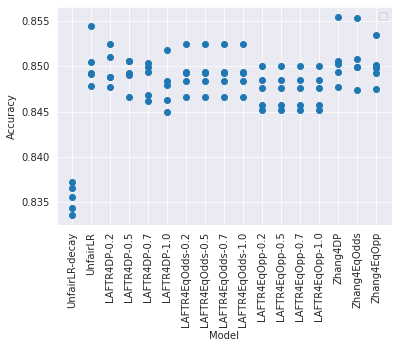

In [36]:
plt.plot()
plt.ylabel('Accuracy')

plt.scatter(model_names, model_accs)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Demographic Disparities

In [37]:
model_dps = unfair['dp'].to_list()+laftr['dp'].to_list()+zhang['dp'].to_list()

No handles with labels found to put in legend.


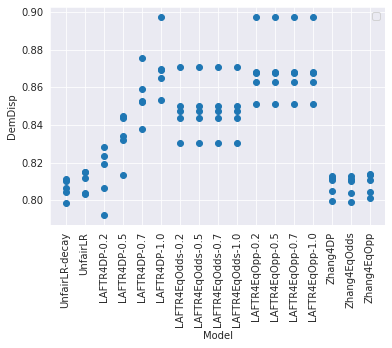

In [38]:
plt.plot()
plt.ylabel('DemDisp')

plt.scatter(model_names, model_dps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Odds

No handles with labels found to put in legend.


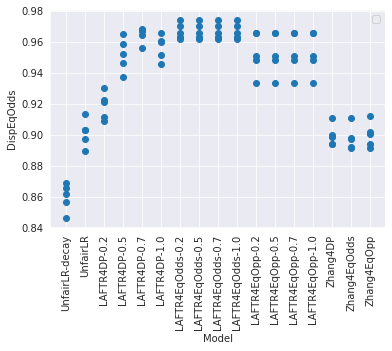

In [39]:
model_deqodds = unfair['deqodds'].to_list()+laftr['deqodds'].to_list()+zhang['deqodds'].to_list()
plt.plot()
plt.ylabel('DispEqOdds')

plt.scatter(model_names, model_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Disparity in Equal Opp

No handles with labels found to put in legend.


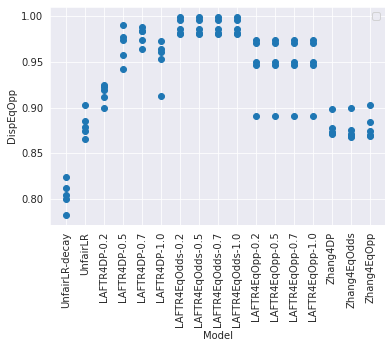

In [40]:
model_deqopps = unfair['deqopp'].to_list()+laftr['deqopp'].to_list()+zhang['deqopp'].to_list()
plt.plot()
plt.ylabel('DispEqOpp')

plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DemDisp

No handles with labels found to put in legend.


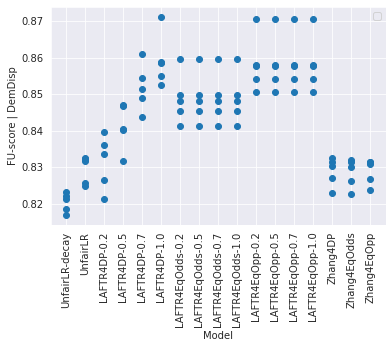

In [41]:
model_trade_dp = unfair['trade_dp'].to_list()+laftr['trade_dp'].to_list()+zhang['trade_dp'].to_list()
plt.plot()
plt.ylabel('FU-score | DemDisp')

plt.scatter(model_names, model_trade_dp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOdds

No handles with labels found to put in legend.


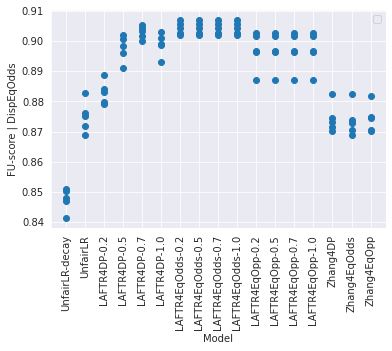

In [42]:
model_trade_deqodds = unfair['trade_deqodds'].to_list()+laftr['trade_deqodds'].to_list()+zhang['trade_deqodds'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOdds')

plt.scatter(model_names, model_trade_deqodds)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Trade-off Acc-DispEqOpp

No handles with labels found to put in legend.


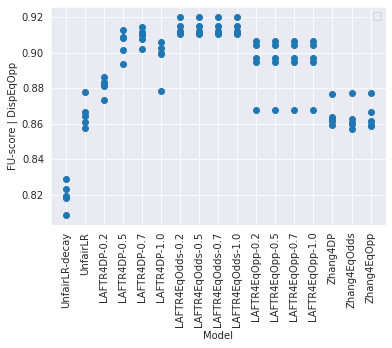

In [43]:
model_trade_deqopp = unfair['trade_deqopp'].to_list()+laftr['trade_deqopp'].to_list()+zhang['trade_deqopp'].to_list()
plt.plot()
plt.ylabel('FU-score | DispEqOpp')

plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")

plt.xlabel('Model')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Plotting Acc x DemDisp

In [44]:
'''cmap=sns.light_palette("seagreen")#,as_cmap=True)
cmap'''

'cmap=sns.light_palette("seagreen")#,as_cmap=True)\ncmap'

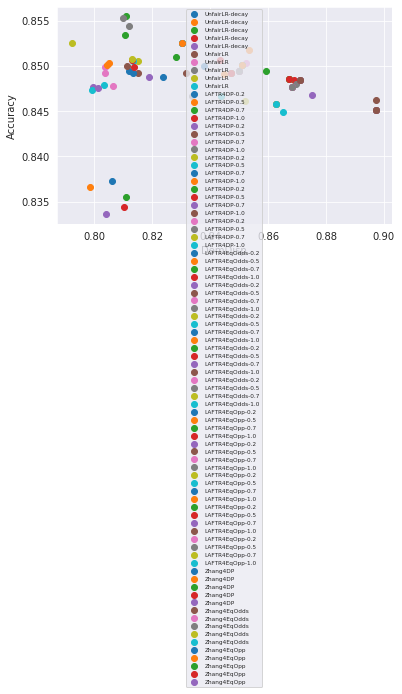

<Figure size 504x504 with 0 Axes>

In [45]:
plt.plot()
#sns.light_palette("seagreen",as_cmap=True)

#fig, ax = plt.scatter(model_dps, model_accs)#, label = "ZHANG DemPar")
'''fig, ax = plt.subplots()
ax.scatter(model_dps, model_accs)'''

plt.xlabel('DemDisp')
plt.ylabel('Accuracy')

for i, model_name in enumerate(model_names):
    plt.scatter(model_dps[i], model_accs[i], label=model_name)#, color=cmap[i])
plt.legend(loc='upper center', fontsize='xx-small')
plt.figure(figsize=(7,7))

plt.show()

## Plotting Acc x DispEqOdds

## Plotting Acc x DispEqOpp

# Pro artigo

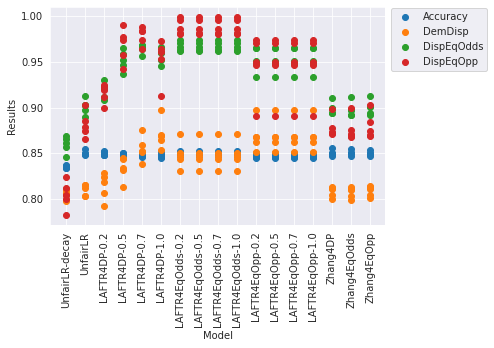

In [46]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_accs)
plt.scatter(model_names, model_dps)
plt.scatter(model_names, model_deqodds)
plt.scatter(model_names, model_deqopps)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['Accuracy', 'DemDisp', 'DispEqOdds', 'DispEqOpp'], bbox_to_anchor=(1.32,1.02), loc="upper right")
plt.show()

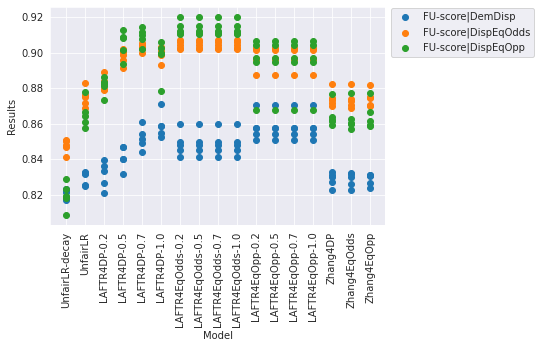

In [47]:

plt.plot()
plt.ylabel('Results')

plt.scatter(model_names, model_trade_dp)
plt.scatter(model_names, model_trade_deqodds)
plt.scatter(model_names, model_trade_deqopp)#, label = "ZHANG DemPar")


plt.xlabel('Model')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,12))
#plt.yticks(range(0.755, 0.985))
#plt.yscale('log')
#plt.yticks([0.755, 0.80, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.90, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975,0.98, 0.985])
plt.legend(['FU-score|DemDisp', 'FU-score|DispEqOdds', 'FU-score|DispEqOpp'], bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()